In [26]:
#import libraries
import pandas as pd
import numpy as np

In [27]:
#load csv file data with headers

location = "datasets/datasets/diamonds.csv"
df = pd.read_csv(location)

In [28]:
df.head() #preview first five rows from diamonds dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
#drop unnamed column since it adds little value to the model
df=df.drop('Unnamed: 0', axis = 1)

In [30]:
df.corr() #get correlation chart for all numeric variables

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [31]:
#Create linear regression model to predict the price of diamonds
import statsmodels.formula.api as smf

In [32]:
#Use all variables in linear regression model
result = smf.ols('price ~ carat + cut + color + clarity + depth + table + x + y +z', data=df).fit()

In [33]:
result.summary() #view summary results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:05:45   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2184.4774    408.197      5.352      0.000    1384.409    2984.546
cut[T.Good]        579.7514     33.592     17.259      0.000     513.911     645.592
cut[T.Ideal]       832.9118     33.407     24.932      0.000     767.433     898.391
cut[T.Premium]     762.1440     32.228     23.649      0.000     698.978     825.310
cut[T.Very Good]   726.7826     32.241     22.542      0.000     663.591     789.975
color[T.E]        -209.1181     17.893    -11.687      0.000    -244.189    -174.047
color[T.F]        -272.8538     18.093    -15.081      0.000    -308.316    -237.392
color[T.G]        -482.0389     17.716    -27.209      0.000    -516.763    -447.315
color[T.H]        -980.2667     18.836    -52.043      0.000   -1017.185    -943.348
color[T.I]       -1466.2445     21.162    -69.286      0.000   -1507.723   -1424.766
color[T.J]       -2369.3981     26.131    -90.674      0.000   -2420.615   -2318.181
clarity[T.IF]     5345.1022     51.024    104.757      0.000    5245.095    5445.110
clarity[T.SI1]    3665.4721     43.634     84.005      0.000    3579.949    3750.995
clarity[T.SI2]    2702.5863     43.818     61.677      0.000    2616.702    2788.471
clarity[T.VS1]    4578.3979     44.546    102.779      0.000    4491.087    4665.708
clarity[T.VS2]    4267.2236     43.853     97.306      0.000    4181.270    4353.177
clarity[T.VVS1]   5007.7590     47.160    106.187      0.000    4915.326    5100.192
clarity[T.VVS2]   4950.8141     45.855    107.967      0.000    4860.938    5040.690
carat             1.126e+04     48.628    231.494      0.000    1.12e+04    1.14e+04
depth              -63.8061      4.535    -14.071      0.000     -72.694     -54.918
table              -26.4741      2.912     -9.092      0.000     -32.181     -20.767
x                -1008.2611     32.898    -30.648      0.000   -1072.741    -943.781
y                    9.6089     19.333      0.497      0.619     -28.284      47.502
z                  -50.1189     33.486     -1.497      0.134    -115.752      15.515
==============================================================================
Omnibus:                    14433.356   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565680.446
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.823   Cond. No.                     7.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#With all independent variables being 0, the starting price for a diamond is likely to be around $2,184.

In [35]:
#remove y and z variables from regression, not very correlated
result = smf.ols('price ~ carat + cut + color + clarity + depth + table + x', data=df).fit()
result.summary() #view summary results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:05:54   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53918   BIC:                         9.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2366.0858    390.351      6.061      0.000    1600.995    3131.177
cut[T.Good]        580.2405     33.572     17.283      0.000     514.438     646.043
cut[T.Ideal]       833.2603     33.396     24.951      0.000     767.804     898.716
cut[T.Premium]     762.7586     32.225     23.670      0.000     699.598     825.919
cut[T.Very Good]   726.8201     32.212     22.564      0.000     663.685     789.955
color[T.E]        -209.2370     17.893    -11.694      0.000    -244.307    -174.167
color[T.F]        -272.8341     18.093    -15.080      0.000    -308.296    -237.372
color[T.G]        -481.9429     17.716    -27.204      0.000    -516.667    -447.219
color[T.H]        -980.1218     18.836    -52.035      0.000   -1017.040    -943.204
color[T.I]       -1466.1815     21.162    -69.283      0.000   -1507.660   -1424.703
color[T.J]       -2369.5038     26.131    -90.678      0.000   -2420.720   -2318.287
clarity[T.IF]     5344.3381     51.015    104.761      0.000    5244.349    5444.327
clarity[T.SI1]    3664.9053     43.627     84.005      0.000    3579.396    3750.415
clarity[T.SI2]    2702.0771     43.812     61.674      0.000    2616.205    2787.949
clarity[T.VS1]    4577.5892     44.535    102.786      0.000    4490.300    4664.879
clarity[T.VS2]    4266.6117     43.847     97.308      0.000    4180.672    4352.551
clarity[T.VVS1]   5007.0611     47.152    106.190      0.000    4914.643    5099.479
clarity[T.VVS2]   4950.1680     45.847    107.972      0.000    4860.308    5040.028
carat             1.126e+04     48.600    231.626      0.000    1.12e+04    1.14e+04
depth              -66.7693      4.091    -16.322      0.000     -74.787     -58.752
table              -26.4573      2.911     -9.089      0.000     -32.163     -20.752
x                -1029.4779     20.549    -50.098      0.000   -1069.755    -989.201
==============================================================================
Omnibus:                    14433.691   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           566407.977
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.833   Cond. No.                     6.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#set coefficient to 0
result = smf.ols(formula='price ~ carat + cut + color + clarity + depth + table + x + y +z - 1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:06:03   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cut[Fair]        2184.4774    408.197      5.352      0.000    1384.409    2984.546
cut[Good]        2764.2288    402.044      6.875      0.000    1976.219    3552.238
cut[Ideal]       3017.3892    394.535      7.648      0.000    2244.097    3790.681
cut[Premium]     2946.6213    398.480      7.395      0.000    2165.597    3727.645
cut[Very Good]   2911.2599    398.604      7.304      0.000    2129.993    3692.526
color[T.E]       -209.1181     17.893    -11.687      0.000    -244.189    -174.047
color[T.F]       -272.8538     18.093    -15.081      0.000    -308.316    -237.392
color[T.G]       -482.0389     17.716    -27.209      0.000    -516.763    -447.315
color[T.H]       -980.2667     18.836    -52.043      0.000   -1017.185    -943.348
color[T.I]      -1466.2445     21.162    -69.286      0.000   -1507.723   -1424.766
color[T.J]      -2369.3981     26.131    -90.674      0.000   -2420.615   -2318.181
clarity[T.IF]    5345.1022     51.024    104.757      0.000    5245.095    5445.110
clarity[T.SI1]   3665.4721     43.634     84.005      0.000    3579.949    3750.995
clarity[T.SI2]   2702.5863     43.818     61.677      0.000    2616.702    2788.471
clarity[T.VS1]   4578.3979     44.546    102.779      0.000    4491.087    4665.708
clarity[T.VS2]   4267.2236     43.853     97.306      0.000    4181.270    4353.177
clarity[T.VVS1]  5007.7590     47.160    106.187      0.000    4915.326    5100.192
clarity[T.VVS2]  4950.8141     45.855    107.967      0.000    4860.938    5040.690
carat            1.126e+04     48.628    231.494      0.000    1.12e+04    1.14e+04
depth             -63.8061      4.535    -14.071      0.000     -72.694     -54.918
table             -26.4741      2.912     -9.092      0.000     -32.181     -20.767
x               -1008.2611     32.898    -30.648      0.000   -1072.741    -943.781
y                   9.6089     19.333      0.497      0.619     -28.284      47.502
z                 -50.1189     33.486     -1.497      0.134    -115.752      15.515
==============================================================================
Omnibus:                    14433.356   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565680.446
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.823   Cond. No.                     1.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Create visualizations for the diamonds dataset

In [37]:
#Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid') #my default is "whitegrid"

In [38]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


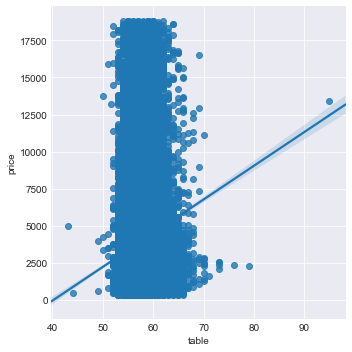

In [43]:
#make a scatterplot
sns.lmplot(x='table', y='price', data=df)

In [ ]:
#We see that the majority of the diamonds' table is between 50 and 70. We notice that that there are a few outliers; some diamonds have a width of the diamond's table above 90 and below 50. 

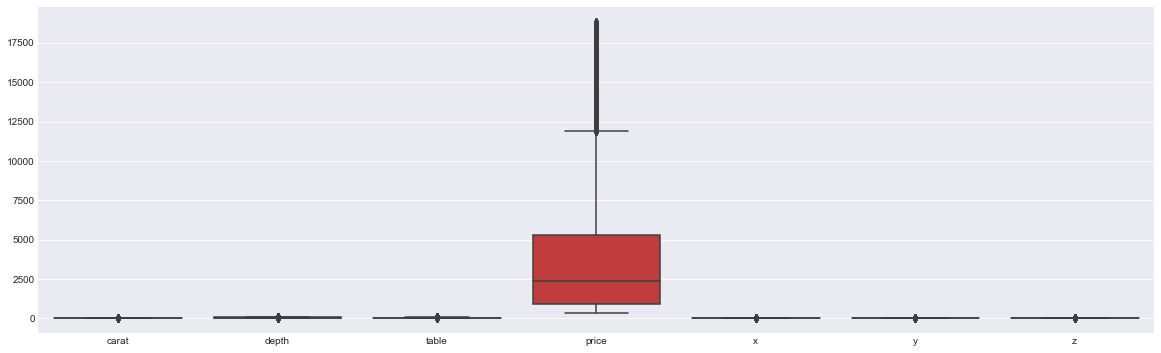

In [49]:
#boxplot showing stats for each variable
plt.subplots(figsize=(20,6))
sns.boxplot(data=df)

In [45]:
#create a dataframe containing the stats for each diamond 
#drop price
stats_df = df.drop(['price'], axis=1)
stats_df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


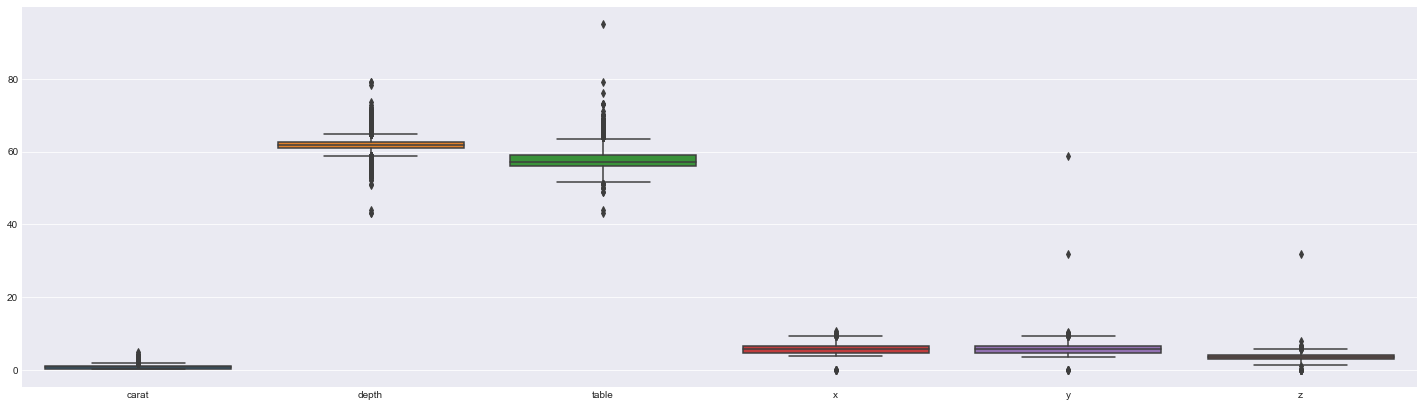

In [55]:
#boxplot for stats
plt.subplots(figsize=(25,7))
sns.boxplot(data=stats_df)

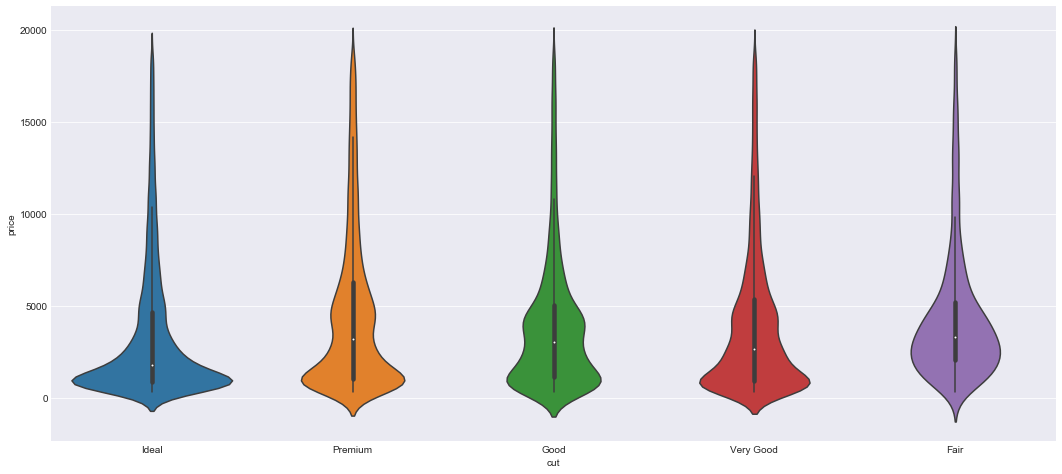

In [60]:
#change size of plot
plt.subplots(figsize=(18,8))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='cut', y='price', data=df)

In [64]:
sns.set_style('whitegrid')

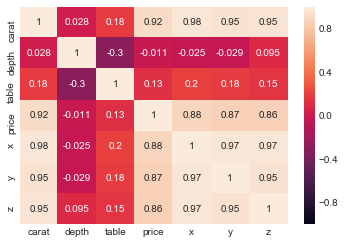

In [67]:
#show correlation of stats via heatmap
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

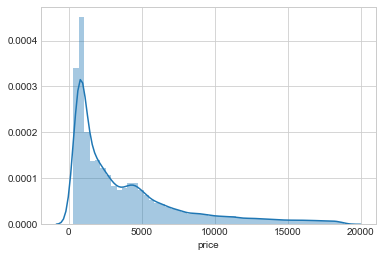

In [68]:
#create a histogram of the distribution of price
sns.distplot(df['price'])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

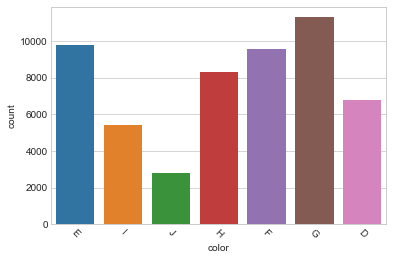

In [70]:
#create a bar plot of carat
sns.countplot(x='color',
              data=df)

plt.xticks(rotation=-45)